In [78]:
from gdc.cms.estimation import dic_prediction
import pandas as pd
import numpy as np

In [79]:
df_predictions = pd.concat(dic_prediction, names=["year", "patient_id"]).reset_index()

In [80]:
df_predictions.head()

,year,patient_id,y,l1linear,l1RF
0,2008,00013D2EFD8E45D1,50.0,5.125039e-07,0.00
1,2008,00016F745862898F,700.0,4.371614e-07,0.00
2,2008,0001FDD721E223DC,0.0,4.383210e-07,0.00
3,2008,00021CA6FF03E670,0.0,4.476642e-07,0.00
4,2008,00024B3D2352D2D0,250.0,4.000000e+02,776.65


In [124]:
list_penalties = []
expenses = df_predictions['y'].sum()

for coef in np.linspace(0,.5, 50):
    this_df = df_predictions.copy()
    this_df['Dlin'] = (1-coef) * this_df['l1linear'] - this_df['y'] 
    this_df['DRF'] = (1-coef) * this_df['l1RF'] - this_df['y']
    penalties = this_df.groupby('patient_id')['DRF'].sum().clip(lower=0)
    pen = penalties.sum() 
    list_penalties.append([coef, pen, pen / expenses])


In [125]:
df_penalties = pd.DataFrame(list_penalties, columns=['coef', 'penalty', 'penalty / total expenses'])

In [126]:
df_penalties.set_index('coef', inplace=True)

<Axes: xlabel='coef'>

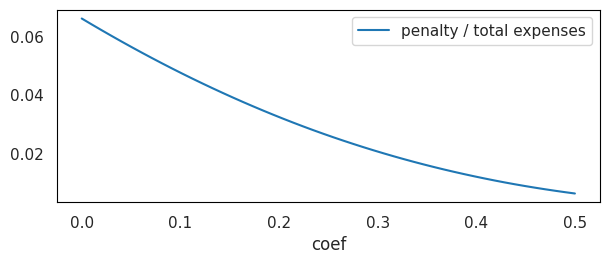

In [130]:
df_penalties[['penalty / total expenses']].plot(figsize=(7, 2.5))